# Baker map

The Baker map descripes the behavior of particles in side dough that is being folded over and over.
The dissipative Baker map is given as

\begin{aligned}
x_{n + 1} &= f(x_n, y_n) \\
y_{n + 1} &= g(x_n, y_n, \alpha) \\
\end{aligned}

with:


%%latex
\begin{aligned}
f_{n} &=  2 * x_n  \\
        g_{n}(x_0, y_0) &=
        \begin{cases}
                  &= \alpha * y_n \text{if } x_n \leq \frac{1}{2} \\
                  &=\frac{1}{2} + \alpha y_n \text{if } x_n > \frac{1}{2} \\
        \end{cases}
\end{aligned}


(200, 2)


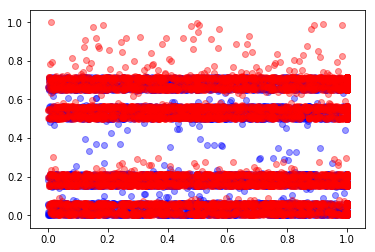

In [6]:
import numpy as np, matplotlib.pyplot as plt


def update(x, a):
    """
    Baker map update; x is a vector consisting of n x 2 points
    """
    x = x.copy()
    x[:, 1] *=  a
    idx = np.where(x[:, 0] > .5)[0]
    x[idx, 1] += .5
    
    x[:, 0] *= 2 #1.9999999
    idx = np.where(x[:, 0] > 1.0)[0]
    while len(idx) > 0:
        x[idx, 0] -= 1
        idx        = np.where(x[:, 0] > 1)[0]
    return x

sim_steps = int(1e2)
n         = 200
res    = np.zeros((sim_steps, n, 2) , dtype = float)

print(res[0].shape)
res[0, :n // 2] = np.random.rand(n // 2, 2) * np.array([1, .5])
res[0, n // 2:] = np.random.rand(n // 2, 2) * np.array([1, .5])
res[0, n // 2:, 1] += .5

a      = .3
for step in range(1, sim_steps):
    res[step] = update(res[step - 1], a)

fig, ax = plt.subplots()
ax.scatter(*res[:, :n // 2].T, color = 'blue', alpha = .4)
ax.scatter(*res[:, n // 2:].T, color = 'red', alpha = .4)

# ax.scatter(*res[0].T, color = 'blue')
fig.show()
    

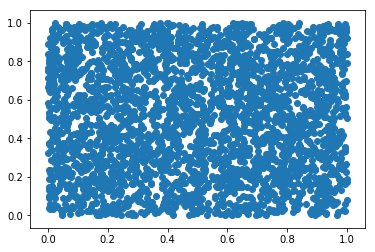

In [82]:
fig, ax = plt.subplots()
ax.scatter(*np.random.rand(2, 3, 1000))